## Importing Libraries

In [1]:
from ucimlrepo import fetch_ucirepo
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import SparsePCA
import numpy as np
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from typing import List, Union, Tuple
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from typing import List, Union, Dict, Tuple
from sklearn.feature_selection import (
    f_classif,
    mutual_info_classif,
    mutual_info_regression,
    chi2,
    RFE,
    SelectFromModel
)
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold
)
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from boruta import BorutaPy
from scipy import stats
import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from typing import Dict, List
import time
from sklearn.decomposition import SparsePCA

2025-03-06 13:34:00.000236: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-06 13:34:00.008046: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-06 13:34:00.067326: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-06 13:34:00.116860: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741255440.162431    7205 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741255440.17

## Class for doing different types of feature selection

In [2]:
class FeatureSelector:
    """
    A comprehensive feature selection toolkit supporting multiple methods:
    - Separation Index (SI): Measures class separation using nearest neighbors
    - ANOVA F-test: Tests for differences in class means
    - Mutual Information: Measures feature-target dependencies
    - Chi-Square: Tests feature-target independence
    - Random Forest Importance: Tree-based feature importance
    - Recursive Feature Elimination (RFE): Iterative feature removal
    - L1-based Selection (Lasso): Regularization-based selection
    - Correlation-based Selection: Removes redundant features
    - PCA: Selects top features based on principal components
    - SparsePCA: Selects features using sparse principal components
    - Boruta: Robust feature selection using random forest
    - ReliefF: Feature selection based on distance metrics and neighbors

    Methods Summary:
    ---------------
    sparse_pca_selection:
        Selects features using Sparse Principal Component Analysis.
        Good for: High-dimensional data with sparse structure, feature correlation

    separation_index_selection: 
        Selects features based on how well they separate classes using nearest neighbors.
        Good for: Detecting local class separation patterns, non-linear relationships
        
    anova_selection:
        Uses F-test to select features based on class mean differences.
        Good for: Linear relationships, normally distributed features
        
    mutual_information_selection:
        Measures information gain between features and target.
        Good for: Both linear and non-linear relationships
        
    chi_square_selection:
        Tests statistical independence between features and target.
        Good for: Categorical features, classification tasks
        
    random_forest_selection:
        Uses tree-based importance scores.
        Good for: Complex interactions, non-linear relationships
        
    recursive_feature_elimination:
        Iteratively removes features using a model's weights.
        Good for: Feature interactions, considering model-specific importance
        
    l1_based_selection:
        Uses L1 regularization to select features.
        Good for: High-dimensional data, sparse feature selection
        
    correlation_based_selection:
        Removes highly correlated features to reduce redundancy.
        Good for: Removing multicollinearity, feature redundancy
        
    pca_selection:
        Selects features based on the principal components capturing the most variance.
        
    boruta_selection:
        Uses Boruta to select important features based on random forest.
        
    reliefF_selection:
        Selects features based on nearest neighbors and distance metrics.
    """

    def __init__(self, X: pd.DataFrame, y: np.ndarray):
        """
        Initialize the feature selector.
        
        Parameters:
        -----------
        X : pd.DataFrame
            Feature matrix
        y : np.ndarray
            Target labels
        """
        self.X = X
        self.y = y
        self.feature_names = X.columns.tolist()
        
    def anova_selection(
        self,
        top_k: Union[int, None] = None,
        threshold: Union[float, None] = None
    ) -> Dict[str, float]:
        """
        Perform ANOVA F-test for feature selection.
        
        Parameters:
        -----------
        top_k : int, optional
            Number of top features to select
        threshold : float, optional
            p-value threshold for feature selection
            
        Returns:
        --------
        Dict[str, float]
            Dictionary of feature names and their F-scores
        """
        F_scores, p_values = f_classif(self.X, self.y)
        feature_scores = dict(zip(self.feature_names, F_scores))
        
        if threshold is not None:
            selected_features = {
                feat: score 
                for feat, score, p_val in zip(self.feature_names, F_scores, p_values)
                if p_val < threshold
            }
        else:
            sorted_features = dict(sorted(
                feature_scores.items(),
                key=lambda x: x[1],
                reverse=True
            ))
            if top_k:
                selected_features = dict(list(sorted_features.items())[:top_k])
            else:
                selected_features = sorted_features
                
        return selected_features
    
    def mutual_information_selection(
        self,
        top_k: Union[int, None] = None,
        threshold: Union[float, None] = None,
        continuous: bool = False
    ) -> Dict[str, float]:
        """
        Perform Mutual Information feature selection.
        
        Parameters:
        -----------
        top_k : int, optional
            Number of top features to select
        threshold : float, optional
            Minimum MI score for feature selection
        continuous : bool, optional
            Whether to use mutual_info_regression for continuous targets
        """
        mi_scores = mutual_info_classif(self.X, self.y)
        feature_scores = dict(zip(self.feature_names, mi_scores))
        
        sorted_features = dict(sorted(
            feature_scores.items(),
            key=lambda x: x[1],
            reverse=True
        ))
        
        if top_k:
            selected_features = dict(list(sorted_features.items())[:top_k])
        elif threshold:
            selected_features = {
                feat: score
                for feat, score in sorted_features.items()
                if score > threshold
            }
        else:
            selected_features = sorted_features
            
        return selected_features
    

    def sparse_pca_selection(self, X_train: pd.DataFrame, top_k: int = 5, random_state: int = 42) -> List[str]:
        """
        Perform feature selection using Sparse PCA.
        
        Parameters:
        -----------
        X_train : pd.DataFrame
            Training data
        top_k : int
            Number of features to select
            
        Returns:
        --------
        List[str]
            Selected feature names
        """
        # Initialize and fit SparsePCA
        sparse_pca = SparsePCA(
            n_components=min(20, X_train.shape[1]),
            random_state=random_state
        )
        sparse_pca.fit(X_train)
        
        # Get feature importance scores based on component loadings
        feature_importance = np.abs(sparse_pca.components_).sum(axis=0)
        
        # Get indices of top features
        top_indices = np.argsort(feature_importance)[-top_k:]
        
        # Return selected feature names
        return list(X_train.columns[top_indices])

    def chi_square_selection(
        self,
        top_k: Union[int, None] = None,
        threshold: Union[float, None] = None
    ) -> Dict[str, float]:
        """
        Perform Chi-Square feature selection.
        Note: Features must be non-negative.
        """
        # Scale features to be non-negative for chi-square
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(self.X)
        
        chi_scores, p_values = chi2(X_scaled, self.y)
        feature_scores = dict(zip(self.feature_names, chi_scores))
        
        if threshold is not None:
            selected_features = {
                feat: score 
                for feat, score, p_val in zip(self.feature_names, chi_scores, p_values)
                if p_val < threshold
            }
        else:
            sorted_features = dict(sorted(
                feature_scores.items(),
                key=lambda x: x[1],
                reverse=True
            ))
            if top_k:
                selected_features = dict(list(sorted_features.items())[:top_k])
            else:
                selected_features = sorted_features
                
        return selected_features
    
    def random_forest_selection(
        self,
        top_k: Union[int, None] = None,
        threshold: Union[float, None] = None,
        n_estimators: int = 100,
        random_state: int = 42
    ) -> Dict[str, float]:
        """
        Perform Random Forest feature importance selection.
        """
        rf = RandomForestClassifier(
            n_estimators=n_estimators,
            random_state=random_state
        )
        rf.fit(self.X, self.y)
        
        feature_scores = dict(zip(
            self.feature_names,
            rf.feature_importances_
        ))
        
        sorted_features = dict(sorted(
            feature_scores.items(),
            key=lambda x: x[1],
            reverse=True
        ))
        
        if top_k:
            selected_features = dict(list(sorted_features.items())[:top_k])
        elif threshold:
            selected_features = {
                feat: score
                for feat, score in sorted_features.items()
                if score > threshold
            }
        else:
            selected_features = sorted_features
            
        return selected_features
    
    def recursive_feature_elimination(
        self,
        n_features_to_select: int,
        step: int = 1,
        estimator: str = 'rf'
    ) -> List[str]:
        """
        Perform Recursive Feature Elimination.
        
        Parameters:
        -----------
        n_features_to_select : int
            Number of features to select
        step : int
            Number of features to remove at each iteration
        estimator : str
            Estimator to use ('rf', 'lr', or 'svm')
        """
        if estimator == 'rf':
            est = RandomForestClassifier(n_estimators=100, random_state=42)
        elif estimator == 'lr':
            est = LogisticRegression(random_state=42)
        elif estimator == 'svm':
            est = LinearSVC(random_state=42)
        else:
            raise ValueError("Estimator must be 'rf', 'lr', or 'svm'")
            
        rfe = RFE(
            estimator=est,
            n_features_to_select=n_features_to_select,
            step=step
        )
        rfe.fit(self.X, self.y)
        
        selected_features = [
            feat for feat, selected in zip(self.feature_names, rfe.support_)
            if selected
        ]
        
        return selected_features
    
    def l1_based_selection(
        self,
        C: float = 1.0,
        penalty: str = 'l1',
        solver: str = 'liblinear'
    ) -> List[str]:
        """
        Perform L1-based feature selection using Logistic Regression.
        """
        l1_selector = SelectFromModel(
            LogisticRegression(
                C=C,
                penalty=penalty,
                solver=solver,
                random_state=42
            )
        )
        l1_selector.fit(self.X, self.y)
        
        selected_features = [
            feat for feat, selected in zip(self.feature_names, l1_selector.get_support())
            if selected
        ]
        
        return selected_features
    
    def correlation_based_selection(
        self,
        threshold: float = 0.7
    ) -> List[str]:
        """
        Select features based on correlation with target and between features.
        """
        # Calculate correlations
        corr_matrix = self.X.corr().abs()
        
        # Find pairs of features with correlation above threshold
        upper_tri = corr_matrix.where(
            np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
        )
        
        # Get features to drop
        to_drop = [
            column for column in upper_tri.columns
            if any(upper_tri[column] > threshold)
        ]
        
        # Keep remaining features
        selected_features = [
            feat for feat in self.feature_names
            if feat not in to_drop
        ]
        
        return selected_features

    def pca_selection(self, top_k: int = 5) -> List[str]:
        """
        Perform PCA and select the top-k features that explain the most variance.
        
        Parameters:
        -----------
        top_k : int, optional
            Number of top principal components to select
        
        Returns:
        --------
        List[str]
            List of selected feature names
        """
        pca = PCA(n_components=top_k)
        pca.fit(self.X)
        
        # Get feature importance based on component loadings
        loadings = np.abs(pca.components_)
        feature_importance = loadings.sum(axis=0)
        
        # Select top features based on importance
        selected_indices = np.argsort(feature_importance)[-top_k:]
        selected_features = [self.feature_names[i] for i in selected_indices]
        
        return selected_features

    def boruta_selection(
        self,
        n_estimators: int = 100,
        max_iter: int = 100,
        top_k: Union[int, None] = None
    ) -> List[str]:
        """
        Perform Boruta feature selection to identify important features.
        
        Parameters:
        -----------
        n_estimators : int, optional
            Number of trees in the random forest
        max_iter : int, optional
            Maximum number of iterations
        top_k : int, optional
            Maximum number of top features to return. If None, returns all selected features.
            If top_k is greater than the number of selected features, returns all selected features.
        
        Returns:
        --------
        List[str]
            List of selected feature names
        """
        rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
        boruta = BorutaPy(
            rf,
            n_estimators='auto',
            max_iter=max_iter,
            random_state=42
        )
        
        # Scale features for Boruta
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(self.X)
        
        boruta.fit(X_scaled, self.y)
        
        # Get ranking scores
        ranking_scores = boruta.ranking_
        
        # Create a list of (feature, rank) tuples
        feature_ranks = list(zip(self.feature_names, ranking_scores))
        
        # Sort features by rank (lower rank is better)
        sorted_features = sorted(feature_ranks, key=lambda x: x[1])
        
        # Get initially selected features
        selected_features = [
            feat for feat, selected in zip(self.feature_names, boruta.support_)
            if selected
        ]
        
        # If top_k is specified, limit the number of features
        if top_k is not None:
            if len(selected_features) < top_k:
                # If we have fewer selected features than top_k,
                # add tentative features based on ranking until we reach top_k
                tentative_features = [
                    feat for feat, rank in sorted_features 
                    if feat not in selected_features
                ]
                additional_needed = top_k - len(selected_features)
                selected_features.extend(tentative_features[:additional_needed])
            else:
                # If we have more selected features than top_k,
                # keep only the top_k features based on ranking
                feature_ranking = {feat: rank for feat, rank in sorted_features}
                selected_features = sorted(
                    selected_features,
                    key=lambda x: feature_ranking[x]
                )[:top_k]
        
        return selected_features

    def reliefF_selection(
        self,
        k_neighbors: int = 10,
        top_k: Union[int, None] = None
    ) -> List[str]:
        """
        Perform ReliefF feature selection.
        
        Parameters:
        -----------
        k_neighbors : int, optional
            Number of neighbors to consider
        top_k : int, optional
            Number of top features to select
        
        Returns:
        --------
        List[str]
            List of selected feature names
        """
        nn = NearestNeighbors(n_neighbors=k_neighbors + 1)  # +1 to exclude self
        nn.fit(self.X)
        feature_importances = np.zeros(self.X.shape[1])
        
        for i in range(self.X.shape[0]):
            # Find k nearest neighbors
            distances, indices = nn.kneighbors(self.X.iloc[i].values.reshape(1, -1))
            indices = indices[0][1:]  # Exclude self
            
            # Split neighbors by class
            same_class = indices[self.y[indices] == self.y[i]]
            diff_class = indices[self.y[indices] != self.y[i]]
            
            if len(same_class) == 0 or len(diff_class) == 0:
                continue
                
            # Calculate feature importance
            for j in range(self.X.shape[1]):
                same_class_diff = np.mean(np.abs(
                    self.X.iloc[same_class, j] - self.X.iloc[i, j]
                ))
                diff_class_diff = np.mean(np.abs(
                    self.X.iloc[diff_class, j] - self.X.iloc[i, j]
                ))
                feature_importances[j] += (diff_class_diff - same_class_diff)
        
        # Sort features by importance
        sorted_indices = np.argsort(feature_importances)[::-1]
        if top_k:
            sorted_indices = sorted_indices[:top_k]
            
        selected_features = [self.feature_names[i] for i in sorted_indices]
        return selected_features

    def ensemble_feature_importance_selection(
        self,
        models: List[Union[RandomForestClassifier, LogisticRegression, LinearSVC]],
        top_k: Union[int, None] = None,
        threshold: Union[float, None] = None
    ) -> List[str]:
        """
        Select features based on ensemble of multiple models' feature importance.
        
        Parameters:
        -----------
        models : list
            List of scikit-learn models with feature_importances_ or coef_ attribute
        top_k : int, optional
            Number of top features to select
        threshold : float, optional
            Minimum importance score for selection
        
        Returns:
        --------
        List[str]
            List of selected feature names
        """
        feature_importances = np.zeros(self.X.shape[1])
        
        for model in models:
            model.fit(self.X, self.y)
            if hasattr(model, 'feature_importances_'):
                importance = model.feature_importances_
            elif hasattr(model, 'coef_'):
                importance = np.abs(model.coef_.ravel())
            else:
                raise ValueError(
                    f"Model {type(model).__name__} has no feature importance attribute"
                )
            feature_importances += importance / np.sum(importance)  # Normalize
            
        feature_importances /= len(models)
        feature_scores = dict(zip(self.feature_names, feature_importances))
        
        # Sort features by importance
        sorted_features = dict(sorted(
            feature_scores.items(),
            key=lambda x: x[1],
            reverse=True
        ))
        
        if top_k:
            selected_features = dict(list(sorted_features.items())[:top_k])
        elif threshold:
            selected_features = {
                feat: score
                for feat, score in sorted_features.items()
                if score > threshold
            }
        else:
            selected_features = sorted_features
            
        return list(selected_features.keys())

    def separation_index_selection(
        self,
        top_k: Union[int, None] = None,
        threshold: Union[float, None] = None,
        n_neighbors: int = 5
    ) -> Dict[str, float]:
        """
        Perform feature selection using Separation Index (SI).
        
        The SI measures how well each feature separates different classes by analyzing
        the class labels of nearest neighbors in the feature space.
        
        Parameters:
        -----------
        top_k : int, optional
            Number of top features to select
        threshold : float, optional
            Minimum SI score for feature selection (between 0 and 1)
        n_neighbors : int, default=5
            Number of neighbors to consider for SI calculation
            
        Returns:
        --------
        Dict[str, float]
            Dictionary of feature names and their SI scores
        """
        if n_neighbors >= len(self.X):
            raise ValueError("n_neighbors must be less than the number of samples")
            
        si_scores = {}
        for feature in self.feature_names:
            # Reshape feature values for KNN
            feature_values = self.X[feature].values.reshape(-1, 1)
            
            # Fit KNN on single feature, adding 1 to exclude self from neighbors
            knn = NearestNeighbors(n_neighbors=n_neighbors + 1)
            knn.fit(feature_values)
            
            # Get indices of nearest neighbors
            _, indices = knn.kneighbors(feature_values)
            
            # Calculate SI for each sample (excluding self)
            si_values = []
            for i, idx in enumerate(indices):
                # Exclude the first neighbor (self) by using idx[1:]
                neighbors_same_class = np.mean(self.y[idx[1:]] == self.y[i])
                si_values.append(neighbors_same_class)
                
            # Store average SI for this feature
            si_scores[feature] = np.mean(si_values)
        
        # Sort features by SI scores
        sorted_features = dict(sorted(
            si_scores.items(),
            key=lambda x: x[1],
            reverse=True
        ))
        
        # Select features based on criteria
        if top_k:
            selected_features = dict(list(sorted_features.items())[:top_k])
        elif threshold:
            selected_features = {
                feat: score
                for feat, score in sorted_features.items()
                if score > threshold
            }
        else:
            selected_features = sorted_features
            
        return selected_features

## Prposed model

### Class Initialization
- Added `n_neighbors` parameter (defaults to 10) to control the neighborhood size
- Enhanced MLP architecture with larger layers (16→8→output) and increased dropout (0.3, 0.2)

### Neighborhood-Based Model Selection
- Implemented `_find_nearest_neighbors` method to identify similar samples using Euclidean distance
- Created `_evaluate_neighborhood_performance` to measure how well each classifier performs on similar samples
- Weighted neighborhood performance (weight: 2.0) in the model selection criteria

### Multi-Criteria Scoring System
The model selector combines 5 weighted factors:
1. **Correctness** (weight: 3.0) - Did the model predict this sample correctly?
2. **Neighborhood** (weight: 2.0) - How well does it work on similar samples?
3. **Confidence** (weight: 1.0) - How confident is the prediction? (negative if incorrect)
4. **Overall Accuracy** (weight: 0.5) - How good is the model across all samples?
5. **Difficulty Bonus** (weight: 0.5) - Extra points for correctly predicting difficult samples

### Nested Cross-Validation Training
- Outer CV (n_folds) creates different train/validation splits
- Inner CV (5 folds) trains base classifiers on subsets of each training fold
- Base classifiers are trained on inner folds, then retrained on the entire training fold
- Validation data from each fold is used to train the selector model
- 20% of selector training data is used for validation during MLP training

### Additional Enhancements
- Added class weights in the selector MLP to handle imbalanced model selections
- Improved predict methods to only use classifiers that are actually selected
- Ensured compatibility with scikit-learn's estimator interface
- Fixed potential index issues in predict_proba

This implementation effectively selects the most appropriate model for each sample based on its neighborhood characteristics, improving overall classification performance especially for difficult or borderline samples.

In [11]:
import numpy as np
import pandas as pd
from typing import Dict, List, Tuple, Optional
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import StandardScaler
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
import warnings
warnings.filterwarnings('ignore')

class ModelSelectorClassifier(BaseEstimator, ClassifierMixin):
    """
    A completely redesigned classifier that uses a simpler and more effective approach:
    1. Uses a Random Forest as the meta-learner instead of a neural network
    2. Uses the probabilities from base classifiers as meta-features
    3. Implements proper cross-validation without information leakage
    """
    
    def __init__(
        self,
        n_folds: int = 5,
        random_state: int = 42,
        meta_learner='rf',  # 'rf' or 'lr'
        verbose: bool = True,
        use_proba: bool = True
    ):
        self.n_folds = n_folds
        self.random_state = random_state
        self.meta_learner = meta_learner
        self.verbose = verbose
        self.use_proba = use_proba
        
    def _initialize_classifiers(self):
        """Initialize base classifiers with proper parameters."""
        self.base_classifiers_ = {
            "RF": RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=self.random_state),
            "LR": LogisticRegression(max_iter=5000, C=1.0, solver='saga', random_state=self.random_state), 
            "XGB": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=self.random_state),
            "DT": DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=self.random_state),
            "SVM": SVC(C=1.0, kernel='rbf', probability=True, random_state=self.random_state),
            "KNN": KNeighborsClassifier(n_neighbors=5, weights='distance'),
            "NB": GaussianNB(),
            "GB": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=self.random_state)
        }
        # Store classifier names in a list to ensure consistent ordering
        self.classifier_names_ = list(self.base_classifiers_.keys())
    
    def _create_meta_learner(self):
        """Create a meta-learner based on the specified type."""
        if self.meta_learner == 'rf':
            return RandomForestClassifier(
                n_estimators=200,
                max_depth=10,
                min_samples_leaf=5,
                random_state=self.random_state
            )
        elif self.meta_learner == 'lr':
            return LogisticRegression(
                max_iter=5000,
                C=1.0,
                solver='saga',
                random_state=self.random_state
            )
        else:
            raise ValueError(f"Unknown meta_learner: {self.meta_learner}")

    def fit(self, X, y):
        """
        Fit the classifier using a stack-based approach.
        """
        # Input validation
        X, y = check_X_y(X, y)
        
        # Store the classes seen during fit
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        
        # Initialize components
        self.scaler_ = StandardScaler()
        self._initialize_classifiers()
        
        # Scale features
        X_scaled = self.scaler_.fit_transform(X)
        
        # Use stratified K-fold to maintain class distribution
        cv = StratifiedKFold(n_splits=self.n_folds, shuffle=True, random_state=self.random_state)
        
        # Initialize storage for meta-learner training data
        n_samples = X.shape[0]
        
        if self.use_proba:
            # For probability-based stacking: store probabilities for each class
            n_meta_features = len(self.classifier_names_) * n_classes
            X_meta_train = np.zeros((n_samples, n_meta_features))
        else:
            # For prediction-based stacking: store just the predictions
            n_meta_features = len(self.classifier_names_)
            X_meta_train = np.zeros((n_samples, n_meta_features))
        
        # For tracking individual model performance
        base_accuracies = {name: 0.0 for name in self.classifier_names_}
        fold_accuracies = []
        
        # For each fold in cross-validation
        for fold_idx, (train_idx, val_idx) in enumerate(cv.split(X_scaled, y)):
            if self.verbose:
                print(f"\nFold {fold_idx+1}/{self.n_folds}")
                print("-" * 40)
            
            X_train_fold = X_scaled[train_idx]
            y_train_fold = y[train_idx]
            X_val_fold = X_scaled[val_idx]
            y_val_fold = y[val_idx]
            
            # Train each base classifier and collect meta-features
            for i, name in enumerate(self.classifier_names_):
                # Get the classifier
                clf = self.base_classifiers_[name]
                
                # Train on the fold's training data
                clf.fit(X_train_fold, y_train_fold)
                
                # Make predictions on validation data
                y_val_pred = clf.predict(X_val_fold)
                
                # Calculate accuracy for this fold
                acc = accuracy_score(y_val_fold, y_val_pred)
                base_accuracies[name] += acc / self.n_folds
                
                if self.verbose:
                    print(f"{name} Accuracy: {acc:.4f}")
                
                if self.use_proba:
                    # Get prediction probabilities
                    proba = clf.predict_proba(X_val_fold)
                    
                    # Store probabilities as meta-features
                    for j in range(n_classes):
                        col_idx = i * n_classes + j
                        X_meta_train[val_idx, col_idx] = proba[:, j]
                else:
                    # Store predictions as meta-features (one-hot encoded)
                    X_meta_train[val_idx, i] = y_val_pred
            
            # Calculate average accuracy for this fold
            fold_accuracies.append(np.mean([base_accuracies[name] for name in self.classifier_names_]))
        
        # Print overall model performance
        if self.verbose:
            print("\n=== Base Classifier Performance ===")
            print("-" * 40)
            for name in self.classifier_names_:
                print(f"{name:<15} | {base_accuracies[name]:.4f}")
            print("-" * 40)
            print(f"Average Accuracy: {np.mean(list(base_accuracies.values())):.4f}")
            
        # Create and train the meta-learner
        self.meta_classifier_ = self._create_meta_learner()
        self.meta_classifier_.fit(X_meta_train, y)
        
        if self.verbose:
            # Evaluate meta-learner on training data
            meta_pred = self.meta_classifier_.predict(X_meta_train)
            meta_acc = accuracy_score(y, meta_pred)
            print(f"\nMeta-learner accuracy on training data: {meta_acc:.4f}")
            
            # Find the best base classifier for comparison
            best_clf = max(base_accuracies.items(), key=lambda x: x[1])
            print(f"Best individual classifier ({best_clf[0]}): {best_clf[1]:.4f}")
            
            # Visualize feature importances if meta-learner is Random Forest
            if self.meta_learner == 'rf':
                importances = self.meta_classifier_.feature_importances_
                indices = np.argsort(importances)[::-1]
                
                print("\nTop 10 most important meta-features:")
                for i in range(min(10, len(importances))):
                    idx = indices[i]
                    if self.use_proba:
                        clf_idx = idx // n_classes
                        class_idx = idx % n_classes
                        feature_name = f"{self.classifier_names_[clf_idx]} (Class {self.classes_[class_idx]})"
                    else:
                        feature_name = self.classifier_names_[idx]
                    print(f"{feature_name:<20} | {importances[idx]:.4f}")
        
        # Train the base classifiers on the full dataset for final predictions
        for name in self.classifier_names_:
            clf = self.base_classifiers_[name]
            clf.fit(X_scaled, y)
        
        # Store dimensions for validation
        self.n_features_in_ = X.shape[1]
        self.n_meta_features_ = n_meta_features
        self.n_classes_ = n_classes
        
        return self
    
    def _create_meta_features(self, X_scaled):
        """Create meta-features for prediction time."""
        if self.use_proba:
            # For probability-based meta-features
            meta_features = np.zeros((X_scaled.shape[0], self.n_meta_features_))
            
            for i, name in enumerate(self.classifier_names_):
                clf = self.base_classifiers_[name]
                proba = clf.predict_proba(X_scaled)
                
                # Store probabilities as meta-features
                for j in range(self.n_classes_):
                    col_idx = i * self.n_classes_ + j
                    meta_features[:, col_idx] = proba[:, j]
        else:
            # For prediction-based meta-features
            meta_features = np.zeros((X_scaled.shape[0], len(self.classifier_names_)))
            
            for i, name in enumerate(self.classifier_names_):
                clf = self.base_classifiers_[name]
                meta_features[:, i] = clf.predict(X_scaled)
        
        return meta_features

    def predict(self, X):
        """Predict using the stacked classifier."""
        # Check if fit has been called
        check_is_fitted(self)
        
        # Input validation
        X = check_array(X)
        
        # Validate dimensions
        if X.shape[1] != self.n_features_in_:
            raise ValueError(f"X has {X.shape[1]} features, but ModelSelectorClassifier "
                           f"was trained with {self.n_features_in_} features.")
        
        # Scale features
        X_scaled = self.scaler_.transform(X)
        
        # Create meta-features
        X_meta = self._create_meta_features(X_scaled)
        
        # Make final predictions using the meta-learner
        return self.meta_classifier_.predict(X_meta)
    
    def predict_proba(self, X):
        """Predict class probabilities."""
        # Check if fit has been called
        check_is_fitted(self)
        
        # Input validation
        X = check_array(X)
        
        # Scale features
        X_scaled = self.scaler_.transform(X)
        
        # Create meta-features
        X_meta = self._create_meta_features(X_scaled)
        
        # Make probability predictions using the meta-learner
        return self.meta_classifier_.predict_proba(X_meta)
    
    def get_params(self, deep=True):
        """Get parameters for this estimator."""
        return {
            "n_folds": self.n_folds,
            "random_state": self.random_state,
            "meta_learner": self.meta_learner,
            "verbose": self.verbose,
            "use_proba": self.use_proba
        }
    
    def set_params(self, **parameters):
        """Set the parameters of this estimator."""
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def score(self, X, y):
        """Returns the mean accuracy on the given test data and labels."""
        return accuracy_score(y, self.predict(X))

## Function to do evalaute feature selection methods

In [ ]:
class FeatureSelectionComparison:
    """
    A class to compare different feature selection methods using multiple metrics
    and statistical tests.
    """
    
    def __init__(
        self,
        X: pd.DataFrame,
        y: np.ndarray,
        n_features: int = 5,
        random_state: int = 42
    ):
        """
        Initialize the comparison framework.
        
        Parameters:
        -----------
        X : pd.DataFrame
            Feature matrix
        y : np.ndarray
            Target labels
        n_features : int
            Number of features to select
        random_state : int
            Random state for reproducibility
        """
        self.X = X
        self.y = y
        self.n_features = n_features
        self.random_state = random_state
        self.results = None
        
        # Initialize models with proper parameters
        self.models = {
            'RF': RandomForestClassifier(
                n_estimators=100,
                random_state=random_state
            ),
            'LR': LogisticRegression(
                max_iter=2000,
                tol=1e-4,
                random_state=random_state
            ),
            'SVM': SVC(
                probability=True,
                random_state=random_state
            ),
            
        }
        
    def preprocess_data(self) -> Tuple[pd.DataFrame, pd.DataFrame, np.ndarray, np.ndarray]:
        """
        Preprocess the data: scale features and split into train/test sets.
        """
        # Scale features
        scaler = StandardScaler()
        X_scaled = pd.DataFrame(
            scaler.fit_transform(self.X),
            columns=self.X.columns,
            index=self.X.index
        )
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, self.y,
            test_size=0.3,
            stratify=self.y,
            random_state=self.random_state
        )
        
        return X_train, X_test, y_train, y_test
    
    def evaluate_model(
        self,
        model,
        X_train: pd.DataFrame,
        X_test: pd.DataFrame,
        y_train: np.ndarray,
        y_test: np.ndarray
    ) -> Dict[str, float]:
        """
        Evaluate a model using multiple metrics and cross-validation.
        """
        # Cross-validation setup
        cv = StratifiedKFold(
            n_splits=5,
            shuffle=True,
            random_state=self.random_state
        )
        
        # Compute cross-validation scores
        cv_scores = cross_val_score(
            model, X_train, y_train,
            cv=cv,
            scoring='accuracy'
        )
        
        # Fit model and make predictions
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = (
            model.predict_proba(X_test)[:, 1]
            if hasattr(model, 'predict_proba')
            else None
        )
        
        # Calculate metrics
        metrics = {
            'cv_accuracy_mean': cv_scores.mean(),
            'cv_accuracy_std': cv_scores.std(),
            'test_accuracy': accuracy_score(y_test, y_pred),
            'test_precision': precision_score(y_test, y_pred, average='weighted'),
            'test_recall': recall_score(y_test, y_pred, average='weighted'),
            'test_f1': f1_score(y_test, y_pred, average='weighted')
        }
        
        # Add ROC AUC if probability predictions are available
        if y_pred_proba is not None:
            metrics['test_roc_auc'] = roc_auc_score(y_test, y_pred_proba)
        
        return metrics
    
    def run_comparison(self) -> pd.DataFrame:
        """
        Run the comparison of different feature selection methods.
        """
        # Preprocess data
        X_train, X_test, y_train, y_test = self.preprocess_data()
        
        # Initialize feature selector
        selector = FeatureSelector(X_train, y_train)
        
        # Define selection methods
        selection_methods = {
            'SI': lambda: selector.separation_index_selection(top_k=self.n_features),
            'ANOVA': lambda: selector.anova_selection(top_k=self.n_features),
            'MI': lambda: selector.mutual_information_selection(top_k=self.n_features),
            'Chi2': lambda: selector.chi_square_selection(top_k=self.n_features),
            'RF': lambda: selector.random_forest_selection(top_k=self.n_features),
            'RFE': lambda: selector.recursive_feature_elimination(n_features_to_select=self.n_features),
            'L1': lambda: selector.l1_based_selection(),
            'PCA': lambda: selector.pca_selection(top_k=self.n_features),
            'SparsePCA': lambda: selector.sparse_pca_selection(X_train, top_k=self.n_features),
            'Boruta': lambda: selector.boruta_selection(top_k=self.n_features),
            'ReliefF': lambda: selector.reliefF_selection(top_k=self.n_features),
            'Ensemble': lambda: selector.ensemble_feature_importance_selection(
                models=[RandomForestClassifier(), LogisticRegression()],
                top_k=self.n_features
            )
        }
        
        results = []
        
        # Compare methods
        for method_name, select_features in selection_methods.items():
            try:
                print(f"Evaluating {method_name}...")
                
                # Time the feature selection
                start_time = time.time()
                selected_features = select_features()
                selection_time = time.time() - start_time
                
                # Ensure correct number of features
                if isinstance(selected_features, dict):
                    selected_features = list(selected_features.keys())[:self.n_features]
                elif len(selected_features) > self.n_features:
                    selected_features = selected_features[:self.n_features]
                
                # Select features from data
                X_train_selected = X_train[selected_features]
                X_test_selected = X_test[selected_features]
                
                # Evaluate with different models
                for model_name, model in self.models.items():
                    metrics = self.evaluate_model(
                        model, X_train_selected, X_test_selected,
                        y_train, y_test
                    )
                    
                    results.append({
                        'Method': method_name,
                        'Model': model_name,
                        'Selected_Features': ', '.join(selected_features),
                        'Selection_Time': selection_time,
                        **metrics
                    })
                    
            except Exception as e:
                print(f"Error with {method_name}: {str(e)}")
                continue
        
        self.results = pd.DataFrame(results)
        return self.results
    
    def get_best_methods(self) -> pd.DataFrame:
        """
        Find the best feature selection method for each combination of metric and model.
        
        Returns:
        --------
        pd.DataFrame
            DataFrame showing the best method and its score for each metric-model pair
        """
        if self.results is None:
            raise ValueError("Run comparison first using run_comparison()")
            
        # Define metrics to analyze
        metrics = [
            'test_accuracy',
            'test_precision',
            'test_recall',
            'test_f1',
            'test_roc_auc',
            'cv_accuracy_mean'
        ]
        
        best_methods = []
        
        # For each model and metric combination
        for model in self.results['Model'].unique():
            model_data = self.results[self.results['Model'] == model]
            
            for metric in metrics:
                if metric in model_data.columns:
                    # Find the method with the highest score
                    best_idx = model_data[metric].idxmax()
                    best_method = model_data.loc[best_idx]
                    
                    # Add to results
                    best_methods.append({
                        'Model': model,
                        'Metric': metric,
                        'Best_Method': best_method['Method'],
                        'Score': best_method[metric],
                        'Selected_Features': best_method['Selected_Features'],
                        'Selection_Time': best_method['Selection_Time']
                    })
        
        # Convert to DataFrame and sort
        best_df = pd.DataFrame(best_methods)
        best_df = best_df.sort_values(['Model', 'Metric'])
        
        # Format score values
        best_df['Score'] = best_df['Score'].round(4)
        best_df['Selection_Time'] = best_df['Selection_Time'].round(3)
        
        # Add relative improvement over mean
        for model in best_df['Model'].unique():
            for metric in best_df['Metric'].unique():
                mask = (best_df['Model'] == model) & (best_df['Metric'] == metric)
                if mask.any():
                    avg_score = self.results[
                        (self.results['Model'] == model)
                    ][metric].mean()
                    best_score = best_df.loc[mask, 'Score'].iloc[0]
                    improvement = ((best_score - avg_score) / avg_score) * 100
                    best_df.loc[mask, 'Improvement_%'] = improvement.round(2)
        
        return best_df

    def statistical_analysis(self) -> Dict[str, pd.DataFrame]:
        """
        Perform statistical analysis on the results.
        """
        if self.results is None:
            raise ValueError("Run comparison first using run_comparison()")
        
        analyses = {}
        
        # Friedman test for each metric
        metrics = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']
        for metric in metrics:
            # Reshape data for Friedman test
            pivot = self.results.pivot(
                index='Model',
                columns='Method',
                values=metric
            )
            
            # Perform Friedman test
            statistic, p_value = stats.friedmanchisquare(*[
                pivot[col] for col in pivot.columns
            ])
            
            analyses[f'friedman_{metric}'] = pd.DataFrame({
                'statistic': [statistic],
                'p_value': [p_value]
            })
        
        return analyses
    
    def plot_results(self) -> None:
        """
        Create visualizations of the results.
        """
        if self.results is None:
            raise ValueError("Run comparison first using run_comparison()")
            
        # Set up the style
        plt.style.use('default')
        
        # Plot 1: Performance comparison
        fig, ax = plt.subplots(figsize=(15, 6))
        data = pd.melt(self.results, 
                      id_vars=['Method', 'Model'],
                      value_vars=['test_accuracy'],
                      var_name='Metric',
                      value_name='Score')
        
        methods = data['Method'].unique()
        models = data['Model'].unique()
        x = np.arange(len(methods))
        width = 0.25
        
        for i, model in enumerate(models):
            mask = data['Model'] == model
            ax.bar(x + i*width, 
                  data[mask]['Score'],
                  width,
                  label=model)
        
        ax.set_ylabel('Accuracy Score')
        ax.set_title('Performance Comparison Across Methods and Models')
        ax.set_xticks(x + width)
        ax.set_xticklabels(methods, rotation=45, ha='right')
        ax.legend()
        plt.tight_layout()
        plt.show()
        
        # Plot 2: Selection time comparison
        plt.figure(figsize=(10, 5))
        time_data = self.results.groupby('Method')['Selection_Time'].mean()
        plt.bar(time_data.index, time_data.values)
        plt.title('Feature Selection Time Comparison')
        plt.xlabel('Method')
        plt.ylabel('Time (seconds)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        # Plot 3: Heatmap of metrics
        plt.figure(figsize=(12, 8))
        metrics = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']
        pivot = self.results.pivot_table(
            index='Method',
            columns='Model',
            values=metrics,
            aggfunc='mean'
        )
        
        im = plt.imshow(pivot.values, aspect='auto', cmap='YlOrRd')
        plt.colorbar(im)
        
        # Add text annotations
        for i in range(pivot.shape[0]):
            for j in range(pivot.shape[1]):
                text = plt.text(j, i, f'{pivot.values[i, j]:.3f}',
                              ha='center', va='center')
        
        plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=45)
        plt.yticks(range(len(pivot.index)), pivot.index)
        plt.title('Performance Metrics Heatmap')
        plt.tight_layout()
        plt.show()


## Compare feature selections

Evaluating SI...
Evaluating ANOVA...
Evaluating MI...
Evaluating Chi2...
Evaluating RF...
Evaluating RFE...
Evaluating L1...
Evaluating PCA...
Evaluating SparsePCA...
Evaluating Boruta...
Evaluating ReliefF...


/home/erfan/.virtualenvs/test/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/home/erfan/.virtualenvs/test/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/home/erfan/.virtualenvs/test/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/home/erfan/.virtualenvs/test/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/home/erfan/.virtualenvs/test/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/home/erfa

Evaluating Ensemble...

Feature Selection Methods Comparison Results

1. Overall Accuracy Summary:
----------------------------------------
Method     Model
ANOVA      LR       0.717
           RF       0.792
           SVM      0.717
Boruta     LR       0.736
           RF       0.774
           SVM      0.774
Chi2       LR       0.774
           RF       0.792
           SVM      0.792
Ensemble   LR       0.698
           RF       0.811
           SVM      0.698
L1         LR       0.774
           RF       0.830
           SVM      0.736
MI         LR       0.755
           RF       0.774
           SVM      0.660
PCA        LR       0.642
           RF       0.792
           SVM      0.679
RF         LR       0.679
           RF       0.755
           SVM      0.660
RFE        LR       0.698
           RF       0.736
           SVM      0.679
ReliefF    LR       0.774
           RF       0.717
           SVM      0.698
SI         LR       0.774
           RF       0.792
           

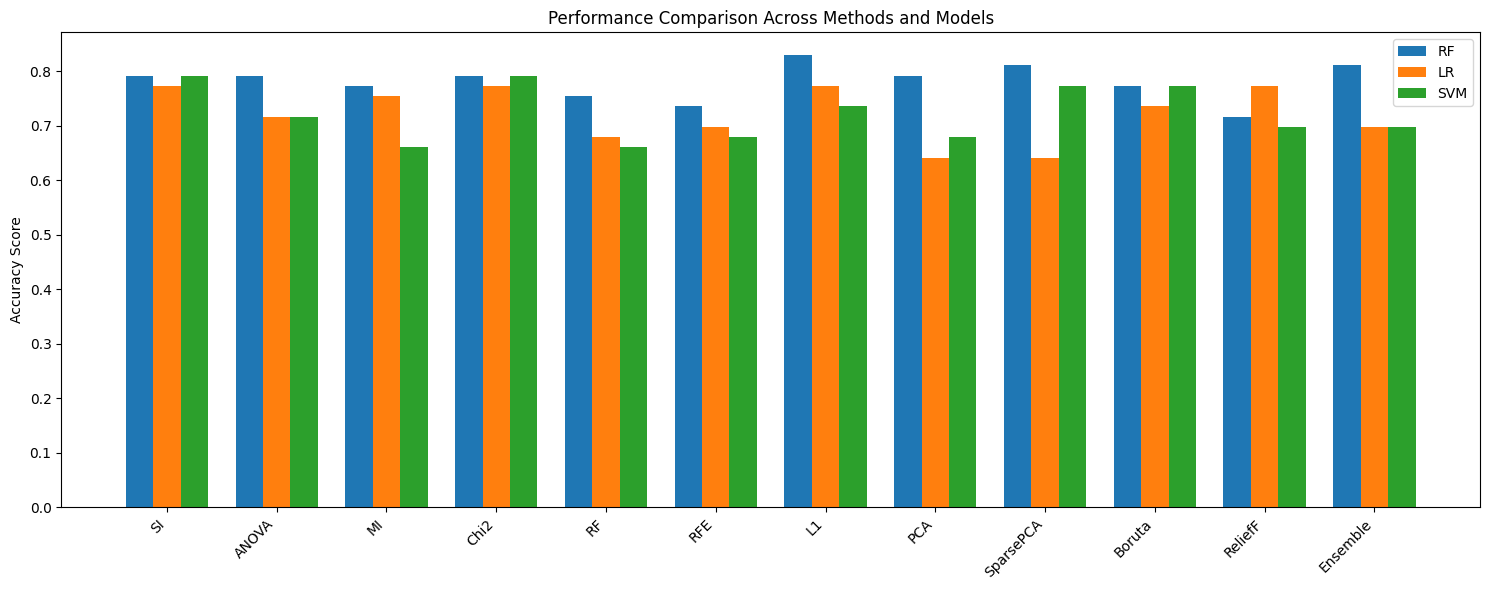

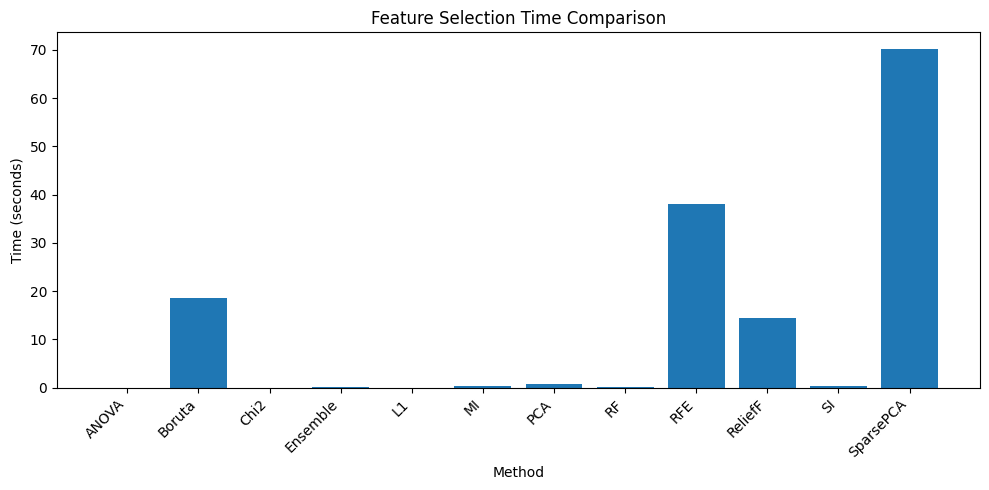

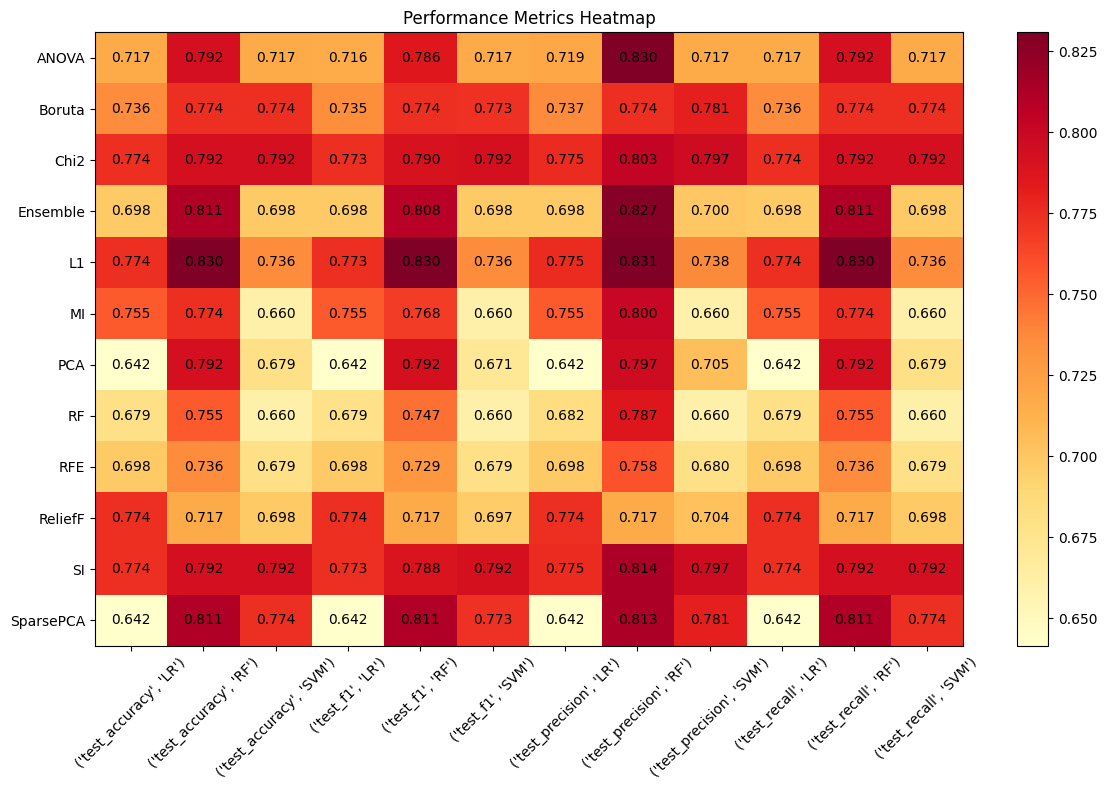

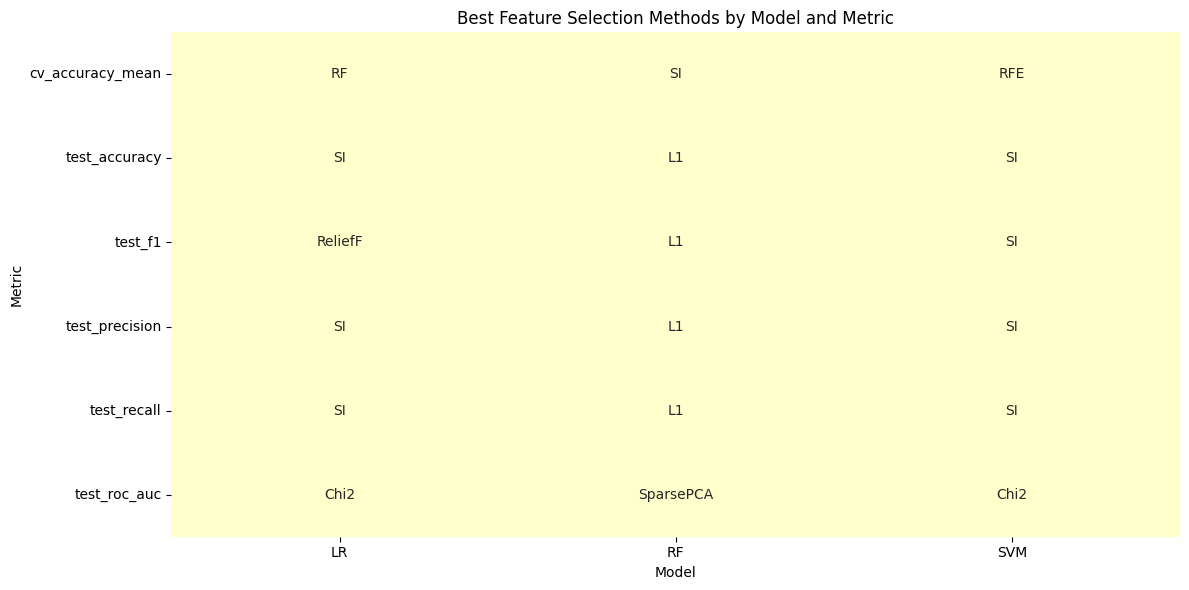


5. Selected Features Summary:
----------------------------------------

Model: LR
Best Method (by accuracy): SI
Selected Features: total_time23, total_time17, paper_time23, mean_gmrt17, air_time17, air_time19, air_time22, paper_time11, total_time13, num_of_pendown19, air_time25, total_time15, air_time16, air_time20, disp_index2

Model: RF
Best Method (by accuracy): L1
Selected Features: mean_acc_in_air1, mean_speed_in_air1, gmrt_on_paper2, mean_speed_on_paper2, gmrt_on_paper3, max_y_extension3, mean_acc_in_air3, mean_jerk_in_air3, num_of_pendown3, max_x_extension4, pressure_var4, pressure_var5, air_time6, gmrt_in_air7, mean_acc_on_paper7

Model: SVM
Best Method (by accuracy): SI
Selected Features: total_time23, total_time17, paper_time23, mean_gmrt17, air_time17, air_time19, air_time22, paper_time11, total_time13, num_of_pendown19, air_time25, total_time15, air_time16, air_time20, disp_index2

Analysis complete! Results have been saved to CSV files.


In [5]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch and prepare data
darwin = fetch_ucirepo(id=732)

X = darwin.data.features.iloc[:, 1:]
y = darwin.data.targets.iloc[:,0]
y = LabelEncoder().fit_transform(y) if y.dtype == 'object' else y

# Initialize comparison
comparison = FeatureSelectionComparison(X, y, n_features=15)

# Run comparison
results = comparison.run_comparison()

print("\n" + "="*80)
print("Feature Selection Methods Comparison Results")
print("="*80)

# Print overall summary
print("\n1. Overall Accuracy Summary:")
print("-"*40)
summary = results.groupby(['Method', 'Model'])['test_accuracy'].mean().round(3)
print(summary)

# Get best methods for each metric-model pair
best_methods = comparison.get_best_methods()

# Print best methods summary
print("\n2. Best Feature Selection Methods by Model and Metric:")
print("-"*60)

for model in best_methods['Model'].unique():
    print(f"\nModel: {model}")
    print("-"*20)
    model_results = best_methods[best_methods['Model'] == model]
    
    # Create a formatted table for each model
    table = pd.DataFrame({
        'Metric': model_results['Metric'],
        'Best Method': model_results['Best_Method'],
        'Score': model_results['Score'].round(4),
        'Improvement %': model_results['Improvement_%'].round(2),
        'Time (s)': model_results['Selection_Time'].round(3)
    })
    print(table.to_string(index=False))

# Perform statistical analysis
analyses = comparison.statistical_analysis()
print("\n3. Statistical Analyses:")
print("-"*40)
for name, analysis in analyses.items():
    print(f"\n{name}:")
    print(analysis)

# Create visualizations
print("\n4. Creating visualizations...")
comparison.plot_results()

# Additional visualization for best methods
plt.figure(figsize=(12, 6))
best_methods_pivot = best_methods.pivot(
    index='Metric',
    columns='Model',
    values='Best_Method'
)
sns.heatmap(
    best_methods_pivot.notna(),
    annot=best_methods_pivot,
    fmt='',
    cmap='YlOrRd',
    cbar=False
)
plt.title('Best Feature Selection Methods by Model and Metric')
plt.tight_layout()
plt.show()

# Save results
results.to_csv('feature_selection_comparison_results.csv', index=False)
best_methods.to_csv('best_feature_selection_methods.csv', index=False)

# Print selected features summary
print("\n5. Selected Features Summary:")
print("-"*40)
for model in best_methods['Model'].unique():
    print(f"\nModel: {model}")
    model_results = best_methods[best_methods['Model'] == model]
    best_accuracy_method = model_results[
        model_results['Metric'] == 'test_accuracy'
    ]['Best_Method'].iloc[0]
    best_features = model_results[
        model_results['Metric'] == 'test_accuracy'
    ]['Selected_Features'].iloc[0]
    print(f"Best Method (by accuracy): {best_accuracy_method}")
    print(f"Selected Features: {best_features}")


print("\nAnalysis complete! Results have been saved to CSV files.")


6. Overall Feature Selection Methods Performance:
------------------------------------------------------------

Overall Performance Summary (sorted by mean of all metrics):
--------------------------------------------------------------------------------
   Method  Overall_Mean  test_accuracy  test_precision  test_recall  test_f1  Selection_Time
       SI        0.7880         0.7862          0.7952       0.7862   0.7846          0.4371
     Chi2        0.7873         0.7862          0.7916       0.7862   0.7852          0.0066
       L1        0.7802         0.7799          0.7813       0.7799   0.7798          0.0054
   Boruta        0.7615         0.7610          0.7637       0.7610   0.7605         18.6084
    ANOVA        0.7448         0.7421          0.7554       0.7421   0.7394          0.0022
SparsePCA        0.7428         0.7421          0.7453       0.7421   0.7418         70.1228
 Ensemble        0.7371         0.7358          0.7417       0.7358   0.7348          0.1145
 

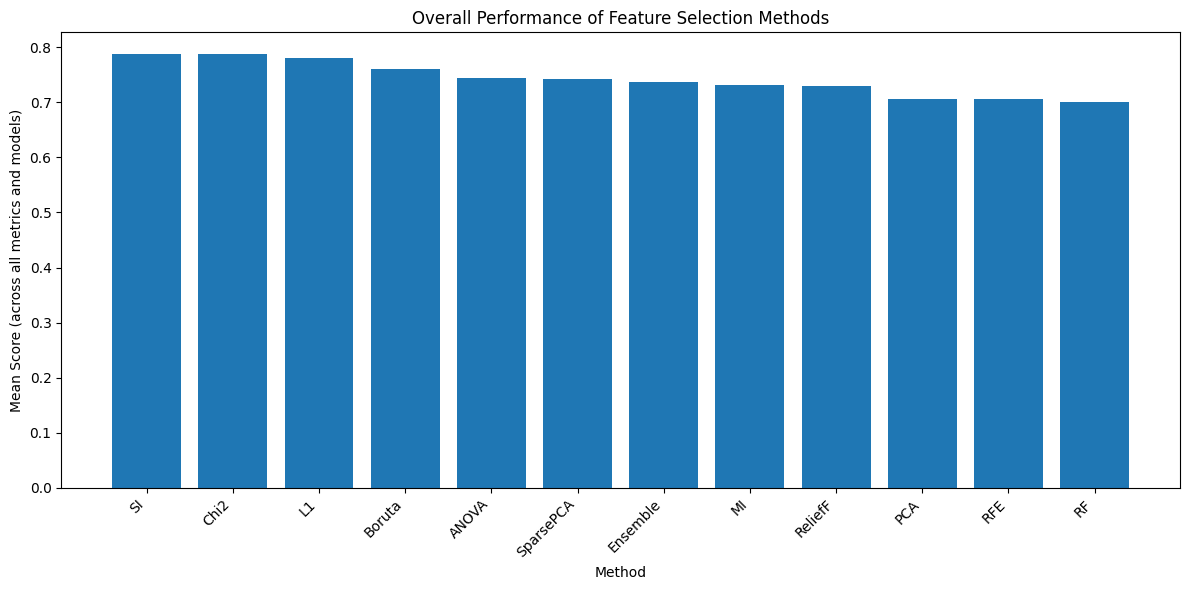


Rankings by Different Metrics:
----------------------------------------
   Method  test_accuracy_rank  test_precision_rank  test_recall_rank  test_f1_rank  Overall_Mean_rank
       SI                 1.5                  1.0               1.5           2.0                1.0
     Chi2                 1.5                  2.0               1.5           1.0                2.0
       L1                 3.0                  3.0               3.0           3.0                3.0
   Boruta                 4.0                  4.0               4.0           4.0                4.0
    ANOVA                 5.5                  5.0               5.5           6.0                5.0
SparsePCA                 5.5                  6.0               5.5           5.0                6.0
 Ensemble                 7.0                  7.0               7.0           7.0                7.0
       MI                 8.5                  8.0               8.5           9.0                8.0
  ReliefF

In [6]:
print("\n6. Overall Feature Selection Methods Performance:")
print("-"*60)

# Define the metrics to include
metrics_to_analyze = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']

# Create a summary dataframe for each method
method_summaries = []
for method in results['Method'].unique():
    method_data = results[results['Method'] == method]
    
    # Get mean scores for each metric
    metric_means = {
        metric: method_data[metric].mean() 
        for metric in metrics_to_analyze
    }
    
    # Calculate overall mean across all metrics and models
    overall_mean = np.mean(list(metric_means.values()))
    
    # Add to summaries
    summary = {
        'Method': method,
        'Overall_Mean': overall_mean,
        **metric_means,
        'Selection_Time': method_data['Selection_Time'].mean()
    }
    method_summaries.append(summary)

# Convert to DataFrame and sort by overall mean
summary_df = pd.DataFrame(method_summaries)
summary_df = summary_df.sort_values('Overall_Mean', ascending=False)

# Round the values for display
display_df = summary_df.round(4)

# Print the summary
print("\nOverall Performance Summary (sorted by mean of all metrics):")
print("-"*80)
print(display_df.to_string(index=False))

# Create a bar plot of overall means
plt.figure(figsize=(12, 6))
plt.bar(summary_df['Method'], summary_df['Overall_Mean'])
plt.title('Overall Performance of Feature Selection Methods')
plt.xlabel('Method')
plt.ylabel('Mean Score (across all metrics and models)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Show ranking for each metric
print("\nRankings by Different Metrics:")
print("-"*40)
ranking_df = summary_df.copy()
for column in metrics_to_analyze + ['Overall_Mean']:
    ranking_df[f'{column}_rank'] = ranking_df[column].rank(ascending=False)

ranking_summary = ranking_df[['Method'] + [f'{col}_rank' for col in metrics_to_analyze + ['Overall_Mean']]]
print(ranking_summary.round(2).to_string(index=False))

## Compare models classification models using 3 different feature selection model

In [ ]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Load and prepare the data
print("Loading data...")
darwin = fetch_ucirepo(id=732)

X = darwin.data.features.iloc[:, 1:]
y = darwin.data.targets.iloc[:,0]
y = LabelEncoder().fit_transform(y) if y.dtype == 'object' else y

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the feature selector with training data
fs = FeatureSelector(X_train, y_train)

# Define feature selection methods
feature_selection_methods = {
    'Ensemble': lambda: fs.ensemble_feature_importance_selection(
        models=[
            RandomForestClassifier(random_state=42),
            LogisticRegression(random_state=42),
            SVC(kernel='linear', random_state=42)
        ],
        top_k=15
    ),
    'RandomForest': lambda: fs.random_forest_selection(top_k=15),
    'Boruta': lambda: fs.boruta_selection(n_estimators=100, max_iter=100,top_k=15)
}

# Define classifiers
classifiers = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'ModelSelector': ModelSelectorClassifier(n_folds=12,random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42),
    'LightGBM': LGBMClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'NaiveBayes': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'Ridge': RidgeClassifier(random_state=42),
    'NeuralNetwork': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

# Dictionary to store results
results = {}

# Perform feature selection and classification
print("\nPerforming feature selection and classification...")
for fs_name, fs_method in feature_selection_methods.items():
    print(f"\nFeature Selection Method: {fs_name}")
    
    # Get selected features
    selected_features = fs_method()
    
    # Select features from data
    if isinstance(selected_features, dict):
        selected_features = list(selected_features.keys())
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    
    print(f"Number of selected features: {len(selected_features)}")
    print("Selected features:", selected_features)
    
    # Train and evaluate each classifier
    for clf_name, clf in classifiers.items():
        print(f"\nTraining {clf_name}...")
        
        # Create and fit pipeline
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', clf)
        ])
        
        # Fit the pipeline
        pipeline.fit(X_train_selected, y_train)
        
        # Make predictions
        y_pred = pipeline.predict(X_test_selected)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store results
        if fs_name not in results:
            results[fs_name] = {}
        results[fs_name][clf_name] = accuracy
        
        print(f"{clf_name} Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

# Create comparison DataFrame
comparison_df = pd.DataFrame(results)
print("\nComparison of all methods:")
print(comparison_df)

# Calculate average performance for each classifier
avg_classifier_performance = comparison_df.mean(axis=1)
print("\nAverage classifier performance across all feature selection methods:")
print(avg_classifier_performance)

# Calculate average performance for each feature selection method
avg_fs_performance = comparison_df.mean()
print("\nAverage feature selection method performance across all classifiers:")
print(avg_fs_performance)

# Find best combination
best_accuracy = 0
best_combination = None

for fs_name in results:
    for clf_name in results[fs_name]:
        accuracy = results[fs_name][clf_name]
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_combination = (fs_name, clf_name)

print(f"\nBest combination: {best_combination[0]} feature selection with {best_combination[1]}")
print(f"Best accuracy: {best_accuracy:.4f}")

Loading data...

Performing feature selection and classification...

Feature Selection Method: Ensemble
Number of selected features: 15
Selected features: ['total_time15', 'total_time23', 'air_time15', 'total_time22', 'total_time9', 'paper_time21', 'air_time22', 'pressure_var19', 'total_time6', 'air_time23', 'total_time20', 'pressure_var5', 'total_time10', 'air_time21', 'air_time16']

Training RandomForest...
RandomForest Accuracy: 0.8857

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.88        15
           1       0.94      0.85      0.89        20

    accuracy                           0.89        35
   macro avg       0.88      0.89      0.88        35
weighted avg       0.89      0.89      0.89        35


Training SVM...
SVM Accuracy: 0.9143

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       1.00      0.85  

## Last worked verison but with low accuracy of selceting classification model

In [ ]:
import numpy as np
import pandas as pd
from typing import Dict, List, Tuple, Optional
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.metrics import f1_score, accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import StandardScaler
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class ModelSelectorClassifier(BaseEstimator, ClassifierMixin):
    """
    A classifier that uses MLP to select the best base classifier for each sample
    based on neighborhood performance, overall accuracy, and prediction confidence.
    """
    
    def __init__(
        self,
        n_folds: int = 10,  # Reduced from 10 to 5 for efficiency
        mlp_epochs: int = 50,
        batch_size: int = 32,
        n_neighbors: int = 2,
        random_state: int = 42,
        # Added customizable weights
        weights: Optional[Dict[str, float]] = None
    ):
        self.n_folds = n_folds
        self.mlp_epochs = mlp_epochs
        self.batch_size = batch_size
        self.n_neighbors = n_neighbors
        self.random_state = random_state
        # Set default weights if not provided
        self.weights = weights if weights is not None else {
            "correct": 3.0,
            "neighborhood": 0, 
            "confidence": 1.0,
            "overall": 0.5,
            "difficulty": 0.5
        }
        
    def _initialize_classifiers(self):
        """Initialize base classifiers with proper random state."""
        self.base_classifiers_ = {
            "RF": RandomForestClassifier(random_state=self.random_state),
            "LR": LogisticRegression(max_iter=2000, random_state=self.random_state),
            "XGB": XGBClassifier(random_state=self.random_state, eval_metric='logloss'),
            "DT": DecisionTreeClassifier(random_state=self.random_state),
            "SVM": SVC(probability=True, random_state=self.random_state),
            "KNN": KNeighborsClassifier(),
            "NB": GaussianNB(),
            "GB": GradientBoostingClassifier(random_state=self.random_state)
        }
        # Store classifier names in a list to ensure consistent ordering
        self.classifier_names_ = list(self.base_classifiers_.keys())
        
    def _create_selector_mlp(self, input_dim: int) -> Sequential:
        """Create MLP model for classifier selection."""
        model = Sequential()
        model.add(Input((input_dim,)))
        model.add(Dense(16, activation='relu'))  # Increased from 8 to 16
        # model.add(Dropout(0.2))  # Increased from 0.1 to 0.2
        model.add(Dense(8, activation='relu'))  # Increased from 8 to 16
        # model.add(Dropout(0.2))  # Increased from 0.1 to 0.2
        model.add(Dense(len(self.classifier_names_), activation='softmax'))
        
        model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        return model
    
    def _find_nearest_neighbors(self, X, n_neighbors=None):
        """
        Find the nearest neighbors for each sample using Euclidean distance.
        
        Args:
            X: Scaled feature matrix
            n_neighbors: Number of neighbors to find (defaults to self.n_neighbors)
            
        Returns:
            Array of indices of nearest neighbors for each sample
        """
        if n_neighbors is None:
            n_neighbors = self.n_neighbors
            
        # Build nearest neighbors model
        nn = NearestNeighbors(n_neighbors=n_neighbors + 1)  # +1 because the sample itself is included
        nn.fit(X)
        
        # Get nearest neighbors for each sample
        distances, indices = nn.kneighbors(X)
        
        # Remove the sample itself (first index)
        return indices[:, 1:]

    def _evaluate_neighborhood_performance(
        self,
        predictions,
        y_true,
        neighbor_indices
    ):
        """
        Evaluate how well each classifier performs in the neighborhood of each sample.
        
        Args:
            predictions: Dictionary mapping classifier names to their predictions
            y_true: Ground truth labels
            neighbor_indices: Indices of nearest neighbors for each sample
            
        Returns:
            Array of neighborhood accuracy scores for each sample and classifier
        """
        n_samples = len(y_true)
        n_classifiers = len(self.classifier_names_)
        
        # Initialize neighborhood performance matrix
        neighborhood_accuracy = np.zeros((n_samples, n_classifiers))
        
        # Convert predictions to array for easier indexing
        pred_array = np.zeros((n_samples, n_classifiers), dtype=int)
        for i, name in enumerate(self.classifier_names_):
            pred_array[:, i] = predictions[name]
        
        # Calculate neighborhood accuracy for each sample and classifier
        for i in range(n_samples):
            neighbors = neighbor_indices[i]
            for j in range(n_classifiers):
                # Check how many neighbors were correctly predicted by this classifier
                correct_preds = pred_array[neighbors, j] == y_true[neighbors]
                neighborhood_accuracy[i, j] = np.mean(correct_preds)
        
        return neighborhood_accuracy

    def _get_prediction_probabilities(self, X_scaled, predictions):
        """
        Get probability scores for each prediction in a vectorized manner.
        
        Args:
            X_scaled: Scaled feature matrix
            predictions: Dictionary mapping classifier names to their predictions
            
        Returns:
            Array of probability scores for each sample and classifier
        """
        n_samples = X_scaled.shape[0]
        n_classifiers = len(self.classifier_names_)
        prob_array = np.zeros((n_samples, n_classifiers))
        
        # For each classifier, get the probability of the predicted class for all samples at once
        for i, name in enumerate(self.classifier_names_):
            clf = self.base_classifiers_[name]
            y_pred = predictions[name]
            
            # Get all probabilities at once
            all_probas = clf.predict_proba(X_scaled)
            
            # Get the probability of the predicted class for each sample
            for j in range(n_samples):
                pred_class = int(y_pred[j])
                # Ensure the predicted class is within bounds of probability output
                if pred_class < all_probas[j].shape[0]:
                    prob_array[j, i] = all_probas[j][pred_class]
                else:
                    prob_array[j, i] = 0.0
                    
        return prob_array

    def _get_best_classifier_indices(
        self,
        X_scaled,
        predictions,
        y_true,
        n_neighbors=None
    ):
        """
        Determine best classifier for each sample using multiple criteria:
        1. Accuracy on the sample itself
        2. Accuracy on the sample's neighborhood
        3. Overall model accuracy
        4. Prediction confidence
        
        Args:
            X_scaled: Scaled feature matrix
            predictions: Dictionary mapping classifier names to their predictions
            y_true: Ground truth labels
            n_neighbors: Number of neighbors to consider (defaults to self.n_neighbors)
            
        Returns:
            Array of best classifier indices for each sample
        """
        if n_neighbors is None:
            n_neighbors = self.n_neighbors
            
        n_samples = len(y_true)
        n_classifiers = len(self.classifier_names_)
        
        # Find nearest neighbors for each sample
        neighbor_indices = self._find_nearest_neighbors(X_scaled, n_neighbors)
        
        # Evaluate neighborhood performance
        neighborhood_accuracy = self._evaluate_neighborhood_performance(
            predictions, y_true, neighbor_indices
        )
        
        # Store predictions in array format for easier processing
        pred_array = np.zeros((n_samples, n_classifiers), dtype=int)
        for i, name in enumerate(self.classifier_names_):
            pred_array[:, i] = predictions[name]
        
        # Get probabilities in a vectorized manner
        prob_array = self._get_prediction_probabilities(X_scaled, predictions)
        
        # Identify correct predictions
        correct_predictions = pred_array == y_true.reshape(-1, 1)
        
        # Calculate overall accuracy for each classifier
        clf_accuracy = np.mean(correct_predictions, axis=0)
        
        # Calculate per-sample difficulty (how many classifiers got it wrong)
        sample_difficulty = n_classifiers - np.sum(correct_predictions, axis=1)
        
        # Calculate combined score for each classifier on each sample
        # This combines sample correctness, neighborhood performance, confidence, and overall accuracy
        combined_score = np.zeros((n_samples, n_classifiers))
        
        # Extract weights from self.weights dictionary
        w_correct = self.weights["correct"]
        w_neighborhood = self.weights["neighborhood"]
        w_confidence = self.weights["confidence"]
        w_overall = self.weights["overall"]
        w_difficulty = self.weights["difficulty"]
        
        for i in range(n_samples):
            for j in range(n_classifiers):
                # Component 1: Correctness on the sample itself
                correctness = correct_predictions[i, j] * w_correct
                
                # Component 2: Neighborhood performance
                neighborhood = neighborhood_accuracy[i, j] * w_neighborhood
                
                # Component 3: Confidence score (only positive if prediction is correct)
                confidence = prob_array[i, j] * w_confidence * (1 if correct_predictions[i, j] else -1)
                
                # Component 4: Overall classifier accuracy
                overall = clf_accuracy[j] * w_overall
                
                # Component 5: Difficulty bonus (reward classifiers that get difficult samples right)
                difficulty_bonus = 0
                if correct_predictions[i, j]:
                    difficulty_bonus = (sample_difficulty[i] / n_classifiers) * w_difficulty
                
                # Combine all components
                combined_score[i, j] = correctness + neighborhood + confidence + overall + difficulty_bonus
        
        # Select the classifier with the highest combined score for each sample
        best_indices = np.argmax(combined_score, axis=1)
        
        return best_indices

    def fit(self, X, y):
        """
        Fit the classifier with neighborhood-aware target assignment
        and cross-validation for training both base classifiers and the selector.
        """
        # Input validation
        X, y = check_X_y(X, y)
        
        # Store the classes seen during fit
        self.classes_ = np.unique(y)
        
        # Initialize components
        self.scaler_ = StandardScaler()
        self._initialize_classifiers()
        
        # Scale features
        X_scaled = self.scaler_.fit_transform(X)
        
        # Initialize K-Fold for outer CV (creates different train/val splits)
        outer_cv = KFold(n_splits=self.n_folds, shuffle=True, random_state=self.random_state)
        
        # Initialize storage for selector training data across all folds
        all_X_selector = []
        all_y_selector = []
        
        # For each fold in outer CV
        for fold, (train_idx, val_idx) in enumerate(outer_cv.split(X_scaled)):
            X_train_fold = X_scaled[train_idx]
            y_train_fold = y[train_idx]
            X_val_fold = X_scaled[val_idx]
            y_val_fold = y[val_idx]
            
            # Train base classifiers on the training fold
            fold_predictions = {name: np.zeros_like(y_val_fold) for name in self.classifier_names_}
            for name in self.classifier_names_:
                clf = self.base_classifiers_[name]
                clf.fit(X_train_fold, y_train_fold)
                
                # Make predictions on validation fold
                fold_predictions[name] = clf.predict(X_val_fold)
            
            # Get best classifier indices for validation samples
            best_indices = self._get_best_classifier_indices(
                X_val_fold, fold_predictions, y_val_fold, n_neighbors=self.n_neighbors
            )
            
            # Store validation data and best indices for selector training
            all_X_selector.append(X_val_fold)
            all_y_selector.append(best_indices)
        
        # Combine all selector training data
        X_selector_train = np.vstack(all_X_selector)
        y_selector_train = np.concatenate(all_y_selector)
        
        # Create and train selector MLP on all collected data
        self.selector_mlp_ = self._create_selector_mlp(X.shape[1])
        
        # Add class weights to handle imbalanced targets
        class_weights = {}
        unique_indices, counts = np.unique(y_selector_train, return_counts=True)
        total = np.sum(counts)
        for idx, count in zip(unique_indices, counts):
            class_weights[int(idx)] = total / (len(unique_indices) * count)
        
        # Train selector with multiple epochs
        history = self.selector_mlp_.fit(
            X_selector_train,
            y_selector_train,
            epochs=self.mlp_epochs,
            batch_size=self.batch_size,
            class_weight=class_weights,
            # validation_split=0.2,  # Use 20% of selector data for validation
            verbose=0  # Reduced verbosity
        )
        
        # Print information about model selection
        print("\n=== Model Selection Information ===")
        
        # 1. Print accuracy of selector on training data
        selector_accuracy = history.history['accuracy'][-1]
        print(f"Selector MLP accuracy on training data: {selector_accuracy:.4f}")
        
        # 2. Print how many times each model was selected
        unique_indices, counts = np.unique(y_selector_train, return_counts=True)
        total_samples = len(y_selector_train)
        
        print("\nModel selection distribution:")
        print("-" * 40)
        print(f"{'Model':<15} | {'Count':<8} | {'Percentage':<10}")
        print("-" * 40)
        
        for idx, count in zip(unique_indices, counts):
            model_name = self.classifier_names_[idx]
            percentage = (count / total_samples) * 100
            print(f"{model_name:<15} | {count:<8} | {percentage:.2f}%")
        
        # Finally, train all base classifiers on the full dataset
        for name in self.classifier_names_:
            clf = self.base_classifiers_[name]
            clf.fit(X_scaled, y)
        
        # Store training data shape for validation
        self.n_features_in_ = X.shape[1]
        
        return self

    def predict(self, X):
        """Predict using the ensemble of classifiers."""
        # Check if fit has been called
        check_is_fitted(self)
        
        # Input validation
        X = check_array(X)
        
        # Validate shape
        if X.shape[1] != self.n_features_in_:
            raise ValueError(f"X has {X.shape[1]} features, but ModelSelectorClassifier "
                           f"was trained with {self.n_features_in_} features.")
        
        # Scale features
        X_scaled = self.scaler_.transform(X)
        
        # Get classifier selections
        classifier_probs = self.selector_mlp_.predict(X_scaled)
        selected_classifiers = np.argmax(classifier_probs, axis=1)
        
        # Make predictions
        predictions = np.zeros(len(X), dtype=int)
        
        # Use the classifier_names_ list to ensure consistent ordering
        for idx, clf_idx in enumerate(np.unique(selected_classifiers)):
            mask = selected_classifiers == clf_idx
            if np.any(mask):  # Only predict if at least one sample uses this classifier
                clf_name = self.classifier_names_[clf_idx]
                clf = self.base_classifiers_[clf_name]
                predictions[mask] = clf.predict(X_scaled[mask])
        
        return predictions
    
    def predict_proba(self, X):
        """Predict class probabilities."""
        # Check if fit has been called
        check_is_fitted(self)
        
        # Input validation
        X = check_array(X)
        
        # Scale features
        X_scaled = self.scaler_.transform(X)
        
        # Get classifier selections
        classifier_probs = self.selector_mlp_.predict(X_scaled)
        selected_classifiers = np.argmax(classifier_probs, axis=1)
        
        # Get predictions
        probas = np.zeros((len(X), len(self.classes_)))
        
        # Use the classifier_names_ list to ensure consistent ordering
        for idx, clf_idx in enumerate(np.unique(selected_classifiers)):
            mask = selected_classifiers == clf_idx
            if np.any(mask):  # Only predict if at least one sample uses this classifier
                clf_name = self.classifier_names_[clf_idx]
                clf = self.base_classifiers_[clf_name]
                probas[mask] = clf.predict_proba(X_scaled[mask])
        
        return probas
    
    def get_params(self, deep=True):
        """Get parameters for this estimator."""
        return {
            "n_folds": self.n_folds,
            "mlp_epochs": self.mlp_epochs,
            "batch_size": self.batch_size,
            "n_neighbors": self.n_neighbors,
            "random_state": self.random_state,
            "weights": self.weights
        }
    
    def set_params(self, **parameters):
        """Set the parameters of this estimator."""
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def score(self, X, y):
        """Returns the mean accuracy on the given test data and labels."""
        return accuracy_score(y, self.predict(X))